In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Cannes2013 & NBAFINALS2015

In [75]:
# read txt data file with headers and convert to dataframe
# df = pd.read_csv('/Users/macbook/Downloads/Cannes2013_Multiplex_Social/Dataset/Cannes2013-activity.txt', sep=' ', header=None, names=['From', 'To', 'Time', 'Layer'])

# read txt data file with headers and convert to dataframe
df = pd.read_csv('/Users/macbook/Downloads/NBAFINALS2015_Multiplex_Social/Dataset/NBAFINALS2015-activity.txt', sep=' ', header=None, names=['From', 'To', 'Time', 'Layer'])

In [76]:
df.head()

,From,To,Time,Layer
0,1,2,1433865027,RT
1,3,4,1433865030,RT
2,5,6,1433865030,RT
3,7,8,1433865031,MT
4,9,10,1433865031,MT


In [77]:
# delete 'Time' column
del df['Time']
df.head()

,From,To,Layer
0,1,2,RT
1,3,4,RT
2,5,6,RT
3,7,8,MT
4,9,10,MT


In [78]:
# get unique values of 'Layer' column
layers = df.Layer.unique()
print(layers)

['RT' 'MT' 'RE']


In [79]:
# extract each layer into a separate dataframe (FOR CANNES2013)
# df_MT = df[df.Layer == layers[0]]
# df_RE = df[df.Layer == layers[1]]
# df_RT = df[df.Layer == layers[2]]

# extract each layer into a separate dataframe (FOR NBAFINALS2015)
df_RT = df[df.Layer == layers[0]]
df_MT = df[df.Layer == layers[1]]
df_RE = df[df.Layer == layers[2]]

In [80]:
# create an adjacency matrix for each layer
adj_MT = nx.from_pandas_edgelist(df_MT, 'From', 'To', create_using=nx.Graph())
adj_RE = nx.from_pandas_edgelist(df_RE, 'From', 'To', create_using=nx.Graph())
adj_RT = nx.from_pandas_edgelist(df_RT, 'From', 'To', create_using=nx.Graph())

In [81]:
# get the number of nodes in each layer
print('MT: ', adj_MT.number_of_nodes())
print('RE: ', adj_RE.number_of_nodes())
print('RT: ', adj_RT.number_of_nodes())

MT:  321515
RE:  47801
RT:  690288


In [82]:
# keep the nodes present in both RT and RE layers and delelte other nodes
nodes_to_keep = list(set(adj_RT.nodes()).intersection(set(adj_RE.nodes())))
adj_RE.remove_nodes_from(list(set(adj_RE.nodes()) - set(nodes_to_keep)))
adj_RT.remove_nodes_from(list(set(adj_RT.nodes()) - set(nodes_to_keep)))

# get the number of nodes in each layer
print('RE: ', adj_RE.number_of_nodes())
print('RT: ', adj_RT.number_of_nodes())

RE:  22802
RT:  22802


In [83]:
# randomly select 1000 nodes that exist in both layers
nodes_to_keep = np.random.choice(list(set(adj_RT.nodes()).intersection(set(adj_RE.nodes()))), 5000, replace=False)
adj_RE.remove_nodes_from(list(set(adj_RE.nodes()) - set(nodes_to_keep)))
adj_RT.remove_nodes_from(list(set(adj_RT.nodes()) - set(nodes_to_keep)))

# get the number of nodes in each layer
print('RE: ', adj_RE.number_of_nodes())
print('RT: ', adj_RT.number_of_nodes())

RE:  5000
RT:  5000


In [84]:
# convert the adjacency matrices to numpy arrays
adj_RE = nx.to_numpy_array(adj_RE)
adj_RT = nx.to_numpy_array(adj_RT)

# get maximum and minimum eigenvalues of the adjacency matrices
print('RE: ', np.linalg.eigvals(adj_RE).max(), np.linalg.eigvals(adj_RE).min())
print('RT: ', np.linalg.eigvals(adj_RT).max(), np.linalg.eigvals(adj_RT).min())

RE:  (11.21443045624522+0j) (-11.173861212317682+0j)
RT:  (20.226044026581388+0j) (-19.377797189814434+0j)


In [53]:
from numpy import linalg as LA

kappa_list = np.linspace(0, 1, 10)
min_G = []
max_G = []
for kappa in kappa_list:
    G = kappa*adj_RE + (1-kappa)*adj_RT
    # get eigenvalues of G using La.eigvals
    eigenvalues, eigenvectors = LA.eig(G)
    min_G.append(min(eigenvalues))
    # print(kappa)

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


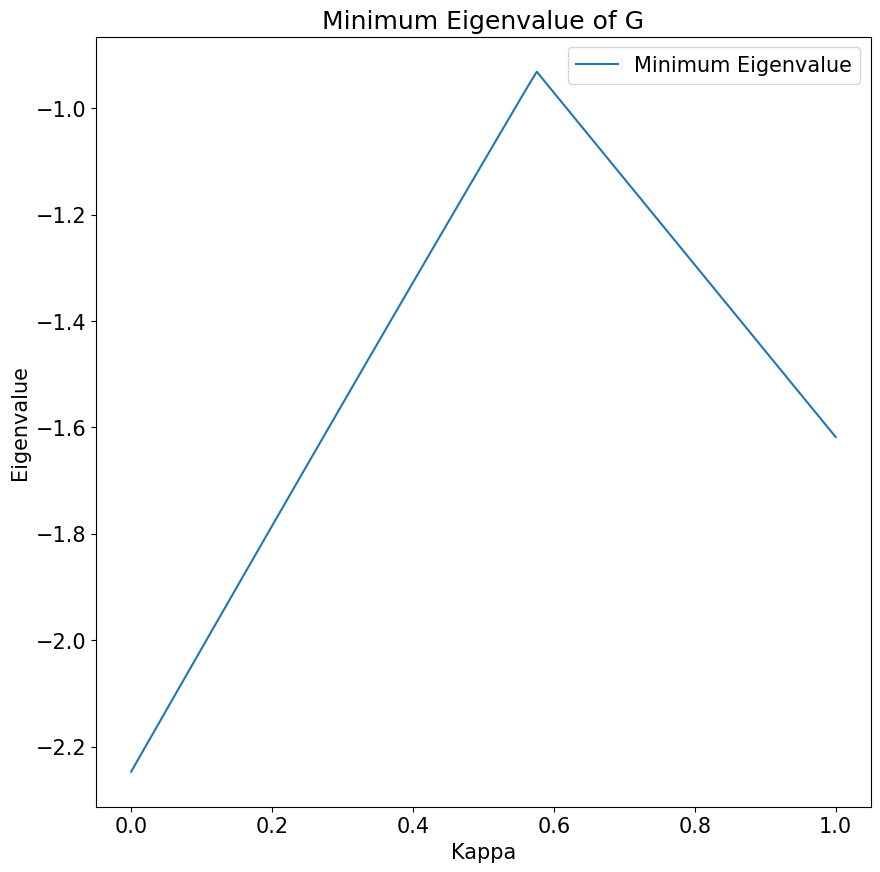

In [54]:
plt.figure(figsize=(10, 10))
plt.title('Minimum Eigenvalue of G')
plt.plot(kappa_list, min_G, label='Minimum Eigenvalue')
plt.rcParams.update({'font.size': 15})
plt.xlabel('Kappa')
plt.ylabel('Eigenvalue')
plt.legend()
# plt.show()
plt.savefig('tweets.png')